In [1]:
#neccessary imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle #saving models
%matplotlib inline

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/training-ml/Files/main/Advertising.csv")

In [3]:
data.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
data=data.drop(columns='Unnamed: 0')

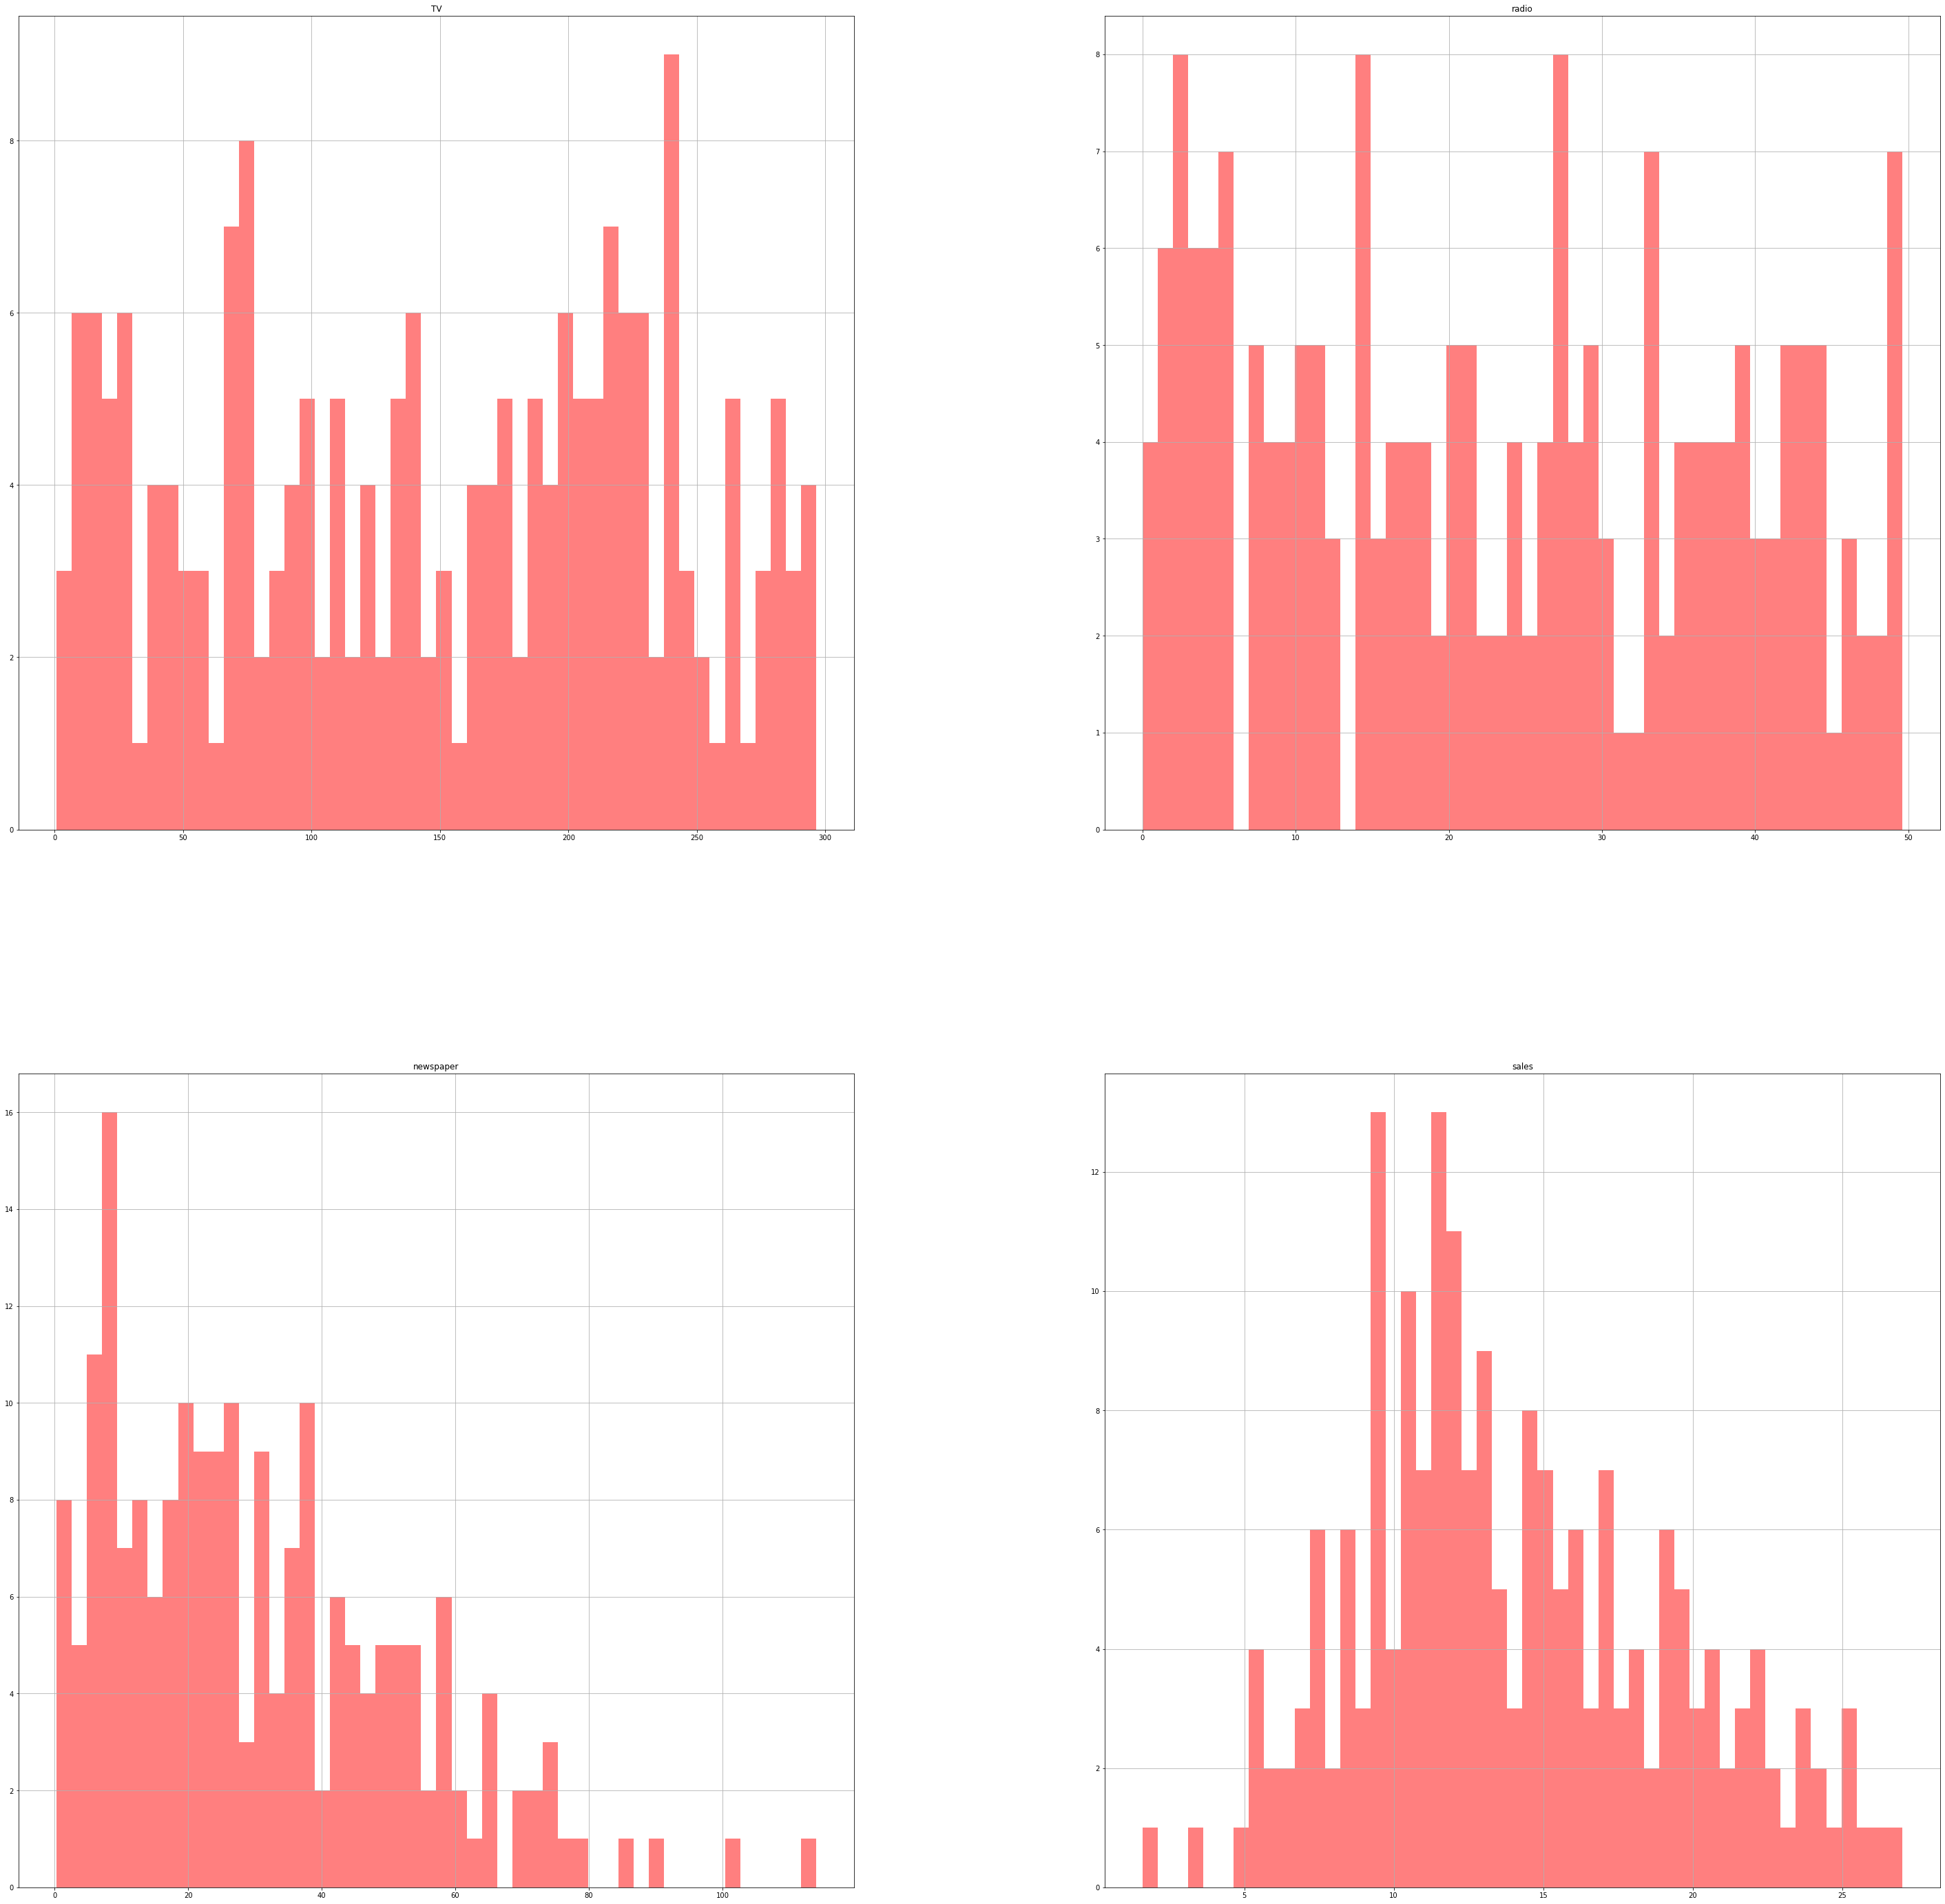

In [6]:
data.hist(color='r',alpha=.50,figsize=(50,50),bins=50)
plt.show()

<AxesSubplot:>

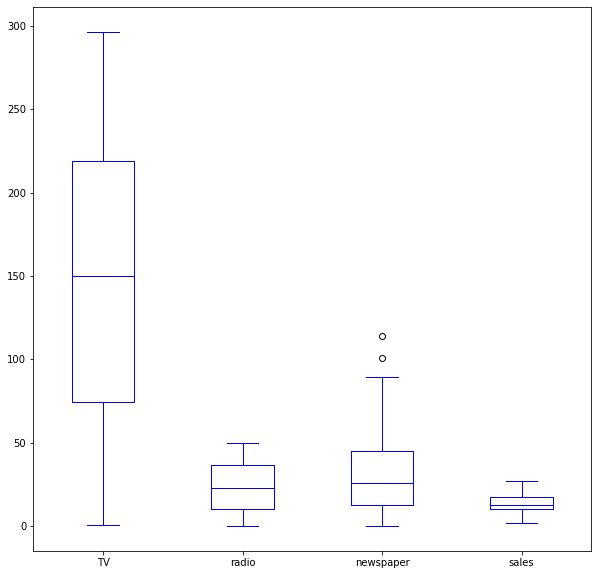

In [7]:
data.plot(kind='box',figsize=(10,10),color='b')

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

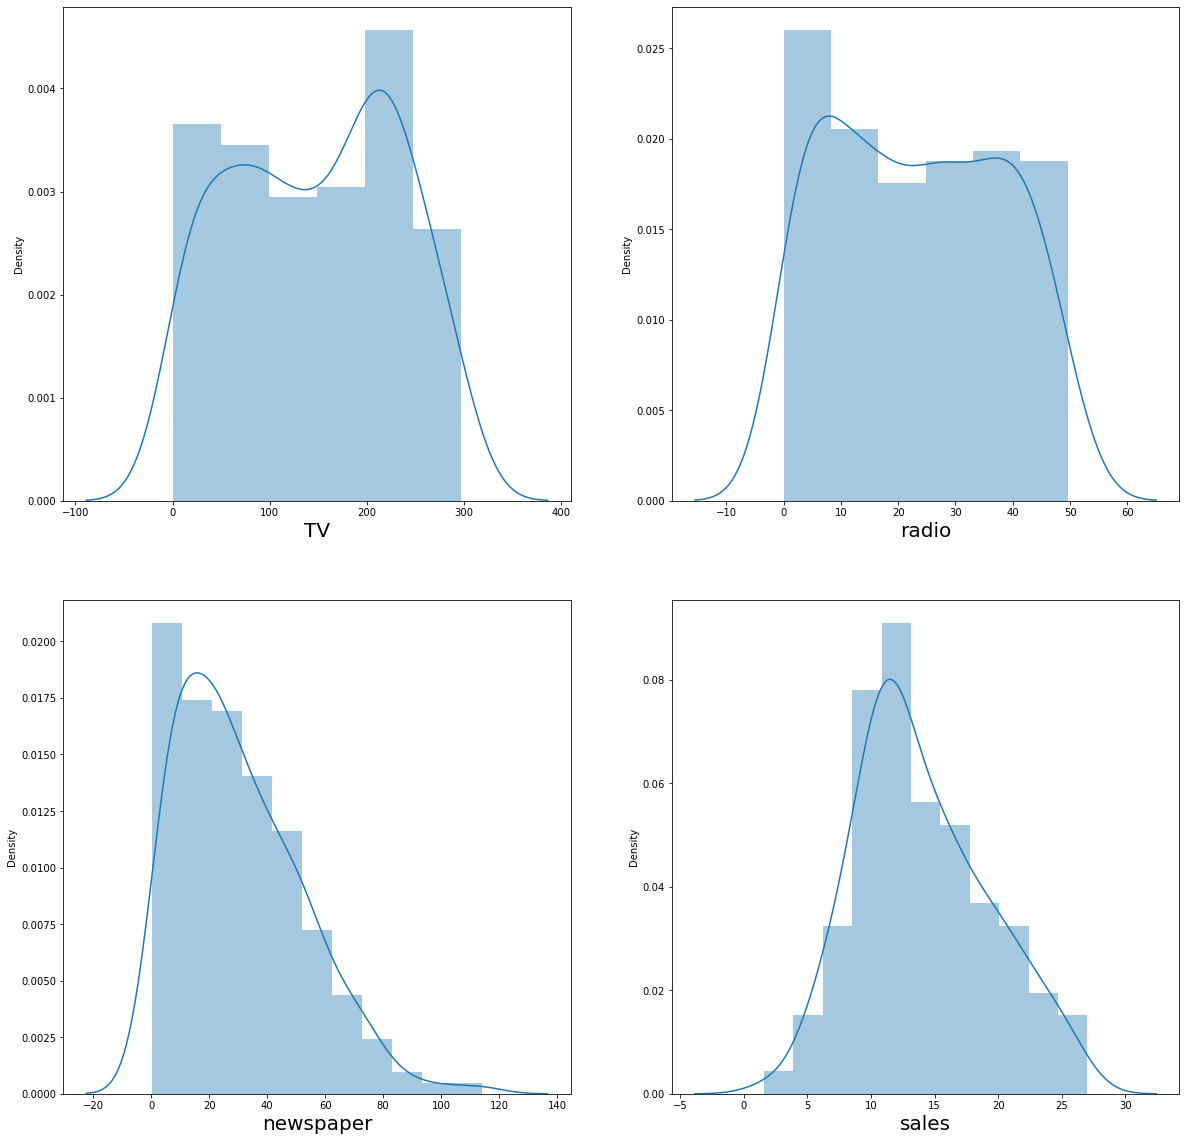

In [8]:
plt.figure(figsize=(20,20),facecolor='w')
plotno=1
for col in data:
    if plotno<=4:
        ax=plt.subplot(2,2,plotno)
        sns.distplot(data[col])
        plt.xlabel(col,fontsize=20)
    plotno+=1
plt.show()

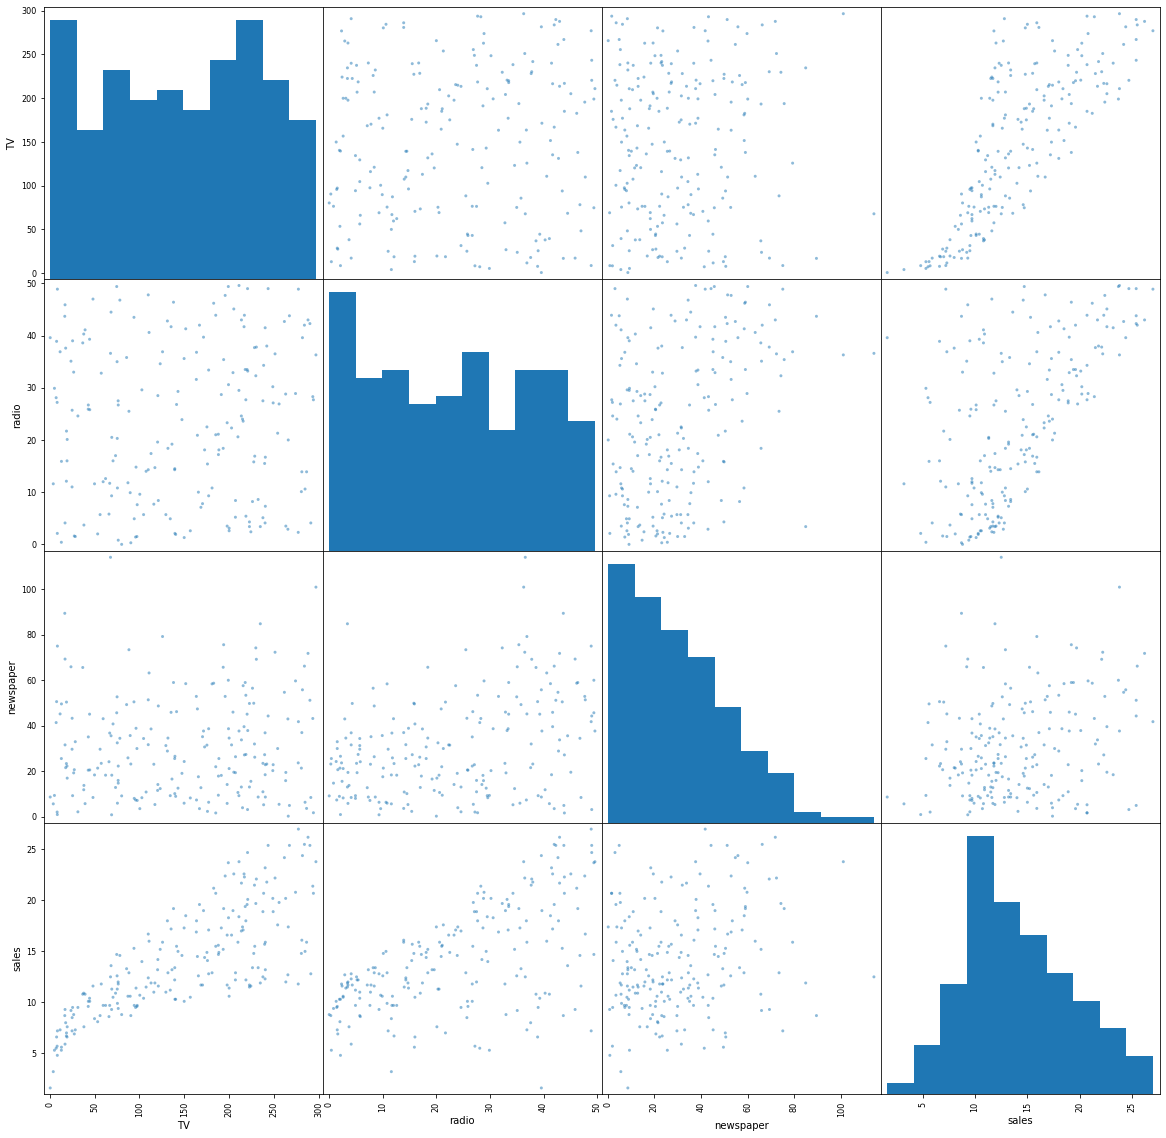

In [9]:
pd.plotting.scatter_matrix(data,alpha=.5,figsize=(20,20))
plt.show()

In [14]:
x=data[['TV']]  #for 2d array
y=data['sales']

In [18]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x,y)

LinearRegression()

In [17]:
#calculating intercept & coef_

print(lr.intercept_)
print(lr.coef_)

7.032593549127693
[0.04753664]


In [21]:
new_x=pd.DataFrame({'TV':[50]})
new_x.head()

,TV
0,50


In [24]:
preds=lr.predict(new_x)  #predictions
preds



array([9.40942557])

In [27]:
#Model Confidence

import statsmodels.formula.api as smf
lm=smf.ols(formula='sales~TV',data=data).fit()
lm.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [28]:
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [30]:
lm.rsquared


0.611875050850071

In [33]:
lm=smf.ols(formula='sales~TV+radio',data=data).fit()
lm.rsquared


0.8971942610828956

In [34]:
lm=smf.ols(formula='sales~TV+radio+newspaper',data=data).fit()
lm.rsquared

0.8972106381789522

In [35]:
lm.conf_int
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 11 Feb 2022   Prob (F-statistic):           1.58e-96
Time:                        16:04:19   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""